# Project IV: Planetary System

## 4.5 Exercises
***
Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from math import sqrt, log10

%matplotlib inline

## 1. Numerical Procedures: Implementation of the Verlet Algorithm

### 1.1 Definitions of functions used for numerically solving Newton's equations of motion for a system of particles

In [2]:
def F(x1, y1):
    r1q = (x1 * x1 + y1 * y1) ** 1.5
    f0 = -G * M * m1 * x1 / r1q
    f1 = -G * M * m1 * y1 / r1q
    return [f0, f1]


def EL(x1, y1, v1x, v1y):
    r1 = (x1 * x1 + y1 * y1) ** 0.5
    v1s = v1x * v1x + v1y * v1y
    em0 = m1 * v1s / 2.0 - G * m1 * M / r1
    em1 = x1 * v1y * m1 - y1 * v1x * m1
    return [em0, em1]


def set_first_elem(vec, v, dt, f, m):
    return vec[0] + v * dt + 0.5 * (f / m) * dt * dt


def set_second_elem(vec, dt2, f, m):
    return 2.0 * vec[1] - vec[0] + dt2 * f / m


def set_velocity(vec, dt):
    return (vec[2] - vec[0]) / 2.0 / dt


def get_data(tE, N, x1, y1, v1x, v1y):
    dt = (tE - 0.0) / N
    dt2 = dt * dt

    forces = F(x1[0], y1[0])
    enemom = EL(x1[0], y1[0], v1x, v1y)

    x1[1] = set_first_elem(x1, v1x, dt, forces[0], m1)
    y1[1] = set_first_elem(y1, v1y, dt, forces[1], m1)

    data = {'t_arr':[0], 'x1_arr':[x1[1]], 'y1_arr':[y1[1]],
            'energy_arr':[enemom[0]], 'mom_arr':[enemom[1]]}

    for n in range(1, N - 1):
        t = n * dt

        forces = F(x1[1], y1[1])

        x1[2] = set_second_elem(x1, dt2, forces[0], m1)
        y1[2] = set_second_elem(y1, dt2, forces[1], m1)

        v1x = set_velocity(x1, dt)
        v1y = set_velocity(y1, dt)

        enemom = EL(x1[2], y1[2], v1x, v1y)

        data['t_arr'].append(t)
        data['x1_arr'].append(x1[1])
        data['y1_arr'].append(y1[1])
        data['energy_arr'].append(enemom[0])
        data['mom_arr'].append(enemom[1])

        x1[0] = x1[1]
        y1[0] = y1[1]

        x1[1] = x1[2]
        y1[1] = y1[2]

    return data


def standard_dev(arr):
    """
    Returns the standard deviation of the values in the array.

    @Parameters
    ------------
    arr : list
        List of numerical values.
    """
    np_arr = np.array(arr)
    diff2 = (np_arr - np.mean(np_arr)) ** 2
    n = len(np_arr)
    return sqrt(sum(diff2) / n)


def run(xp, vp, t, N):
    """
    Sets the proper initial values and returns the data dictionary.

    @Parameters
    ------------
    xp : float
        Initial value of the position on the x axis.
    vp : float
        Initial velocity value in the y direction
    t : float
    N : int
    """
    x1_vec = [0.0] * 3
    x1_vec[0] = xp
    y1_vec = [0.0] * 3
    y1_vec[0] = 0.0
    v1x_pocz = 0.0
    v1y_pocz = vp
    return get_data(t, N, x1_vec, y1_vec, v1x_pocz, v1y_pocz)

### 1.2 Checking the program on the example of the motion of a single planet


In [3]:
# INITIAL DATA - global #
G = 1.0
M = 100.0

m1 = 10.0
# m2 = 0.01


# system parameters and initial conditions
x0 = 5.0
v0 = 4.0
t_max = 40.0
N_max = 100000

# calculations
dat = run(x0, v0, t_max, N_max)

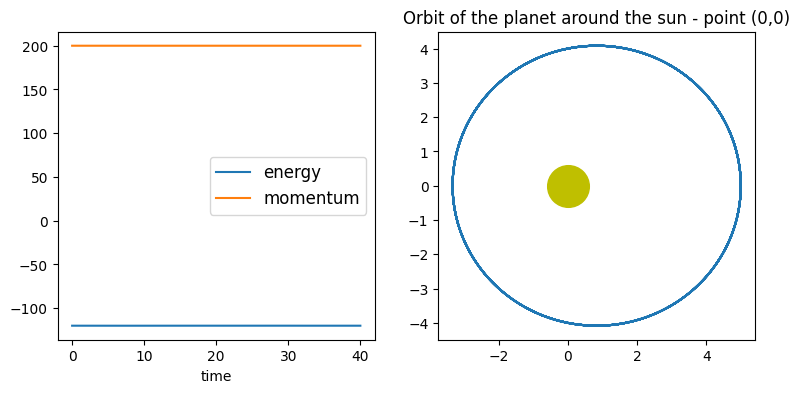

In [4]:
# visualization of the data obtained from the simulation
# checking if energy and momentum are conserved

plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.plot(dat['t_arr'], dat['energy_arr'], label='energy')
plt.plot(dat['t_arr'], dat['mom_arr'], label='momentum')
plt.legend(fontsize=12)
plt.xlabel('time', fontsize=10)

plt.subplot(122)
plt.plot(dat['x1_arr'], dat['y1_arr'])
plt.plot(0.0, 0.0, 'yo', markersize=30)
plt.title('Orbit of the planet around the sun - point (0,0)', fontsize=12)

plt.xlabel
plt.show()

### 1.3 Finding the largest possible time step at which <br> total energy and angular momentum are conserved

In [5]:
t_max = 10.0
x0 = 5.0
v0 = 4.0
dt_arr = []
std_dev = []

for a in np.arange(2, 6.1, 0.2):
    N_max = int(10 ** a)
    dt_arr.append(log10(t_max / N_max))
    dev_dat = run(x0, v0, t_max, N_max)
    std_dev.append(standard_dev(dev_dat['energy_arr']))

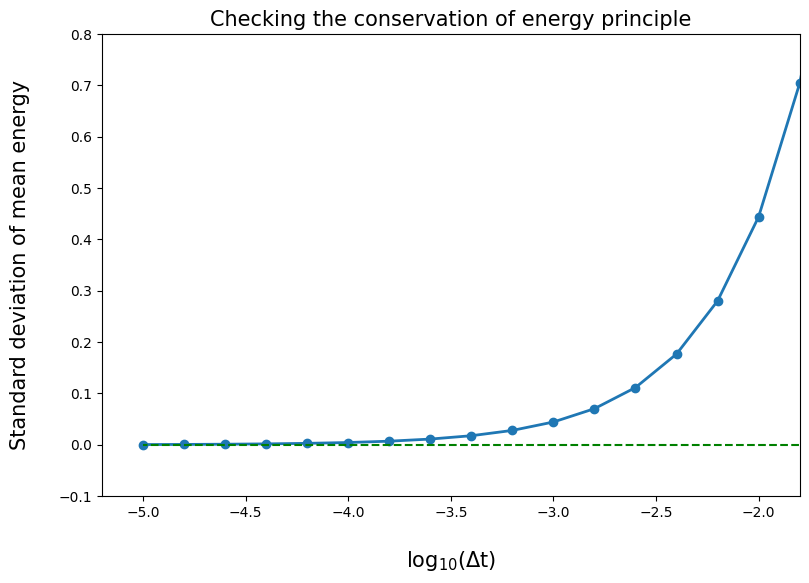

In [6]:
plt.figure(figsize=(9, 6))
step = dt_arr[2:]
plt.plot(step, std_dev[2:], '-o', linewidth=2)
plt.plot(step, [0 for s in step], 'g--', linewidth=1.5)
plt.title('Checking the conservation of energy principle', fontsize=15)
plt.xlabel('\nlog$_{10}$($\Delta$t)', fontsize=15)
plt.ylabel('Standard deviation of mean energy\n', fontsize=15)
plt.xlim(-5.2, -1.8)
plt.ylim(-0.1, 0.8)
plt.show()

## 2. Motion of a Single Planet

### 2.1 Determining the Effective Potential: Identifying Circular, Elliptical, Parabolic, and Hyperbolic Trajectories

In [7]:
L = 100
veff = []
r_arr = []
centr = []
grav = []
sveff = []
sr = []
rrange = np.arange(0, 10, 0.01)

for r in rrange[1:]:
    c = L ** 2 / (2 * m1 * r ** 2)
    centr.append(c)
    g = -G * m1 * M / r
    grav.append(g)
    veff.append(c + g)
    r_arr.append(r)
    if(c == -g):
        sr.append(r)
        sveff.append(c + g)
    if(c + g == -500):
        sr.append(r)
        sveff.append(c + g)
    if(r == 4.44 or r == 0.56):
        sr.append(r)
        sveff.append(c + g)

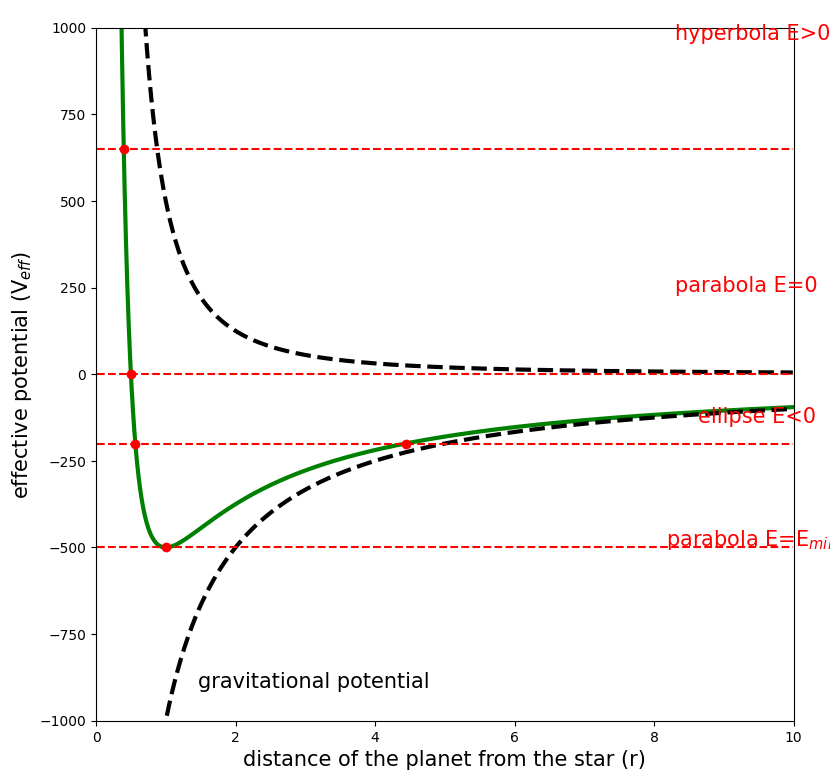

In [8]:
fig, ax = plt.subplots(figsize=(9, 9))

sr = [0.5, 0.4, 0.56, 1.0, 4.44]
sveff = [0.0, 650, -200, -500.0, -200]

# plot a line and add some simple annotations
ax.annotate('parabola E=E$_{min}$', xy=(0.740, 0.280),
            xycoords='figure fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=15, color='red')
ax.annotate('ellipse E<0', xy=(0.775, 0.415), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15, color='red')
ax.annotate('parabola E=0', xy=(0.750, 0.560), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15, color='red')
ax.annotate('hyperbola E>0', xy=(0.750, 0.840), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=15, color='red')
ax.annotate('centrifugal potential', xy=(0.190, 0.900),
            xycoords='figure fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=15, color='black')
ax.annotate('gravitational potential', xy=(0.220, 0.120),
            xycoords='figure fraction', horizontalalignment='left',
            verticalalignment='top', fontsize=15, color='black')

plt.plot(r_arr, veff, '-g', linewidth=3)
plt.plot(r_arr, grav, '--k', linewidth=3)
plt.plot(r_arr, centr, '--k', linewidth=3)
plt.plot(r_arr, [650 for r in r_arr], '--r')
plt.plot(r_arr, [0 for r in r_arr], '--r')
plt.plot(r_arr, [-500 for r in r_arr], '--r')
plt.plot(r_arr, [-200 for r in r_arr], '--r')
plt.plot(sr, sveff, 'or')
plt.xlim(0, 10)
plt.ylim(-1000, 1000)
plt.xlabel('distance of the planet from the star (r)', fontsize=15)
plt.ylabel('effective potential (V$_{eff}$)', fontsize=15)
plt.show()

### 2.2 Simulating Motion for Identified Types of Orbits

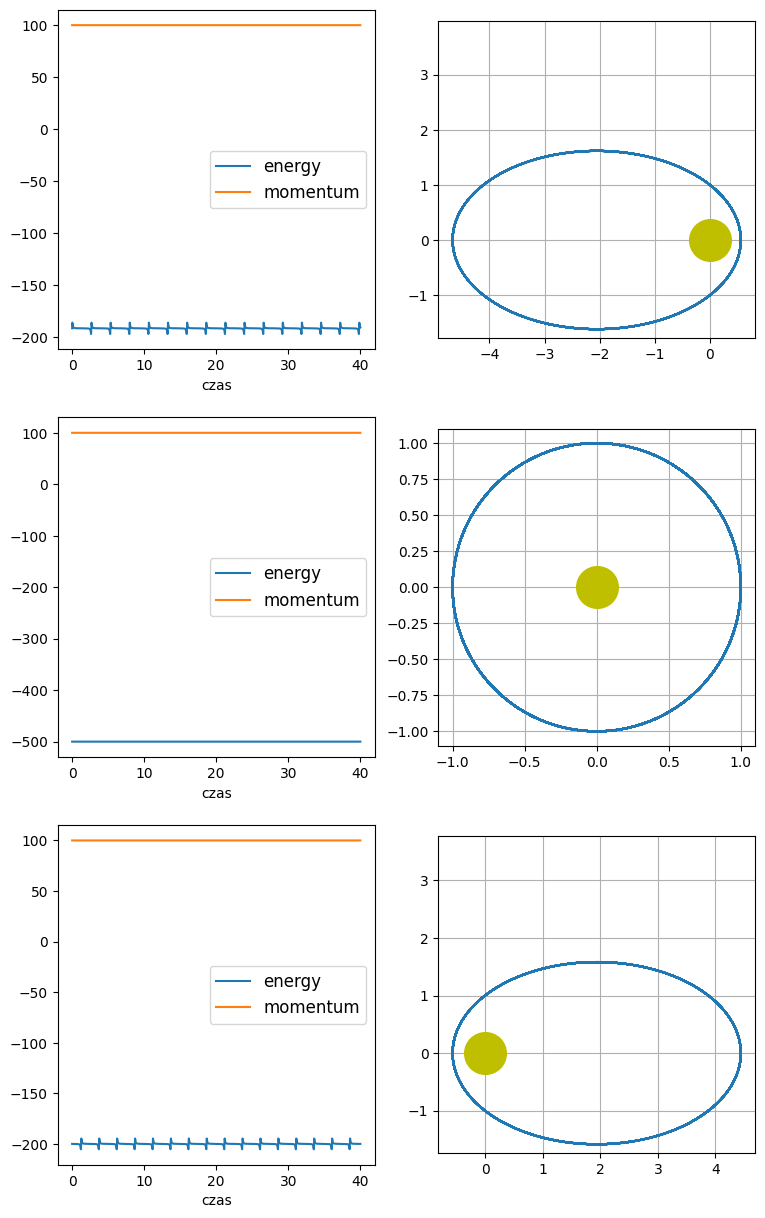

In [9]:
t_max = [40.0, 40.0, 40.0]
N_max = 100000
num = 1
plt.figure(figsize=(9, 15))

for idx in range(len(sr[2:])):
    results = run(sr[idx + 2], L / (m1 * sr[idx + 2]), t_max[idx], N_max)

    plt.subplot(3, 2, num)
    plt.plot(results['t_arr'], results['energy_arr'], label='energy')
    plt.plot(results['t_arr'], results['mom_arr'], label='momentum')
    plt.legend(fontsize=12)
    plt.xlabel('czas', fontsize=10)

    plt.subplot(3, 2, num + 1)
    plt.plot(results['x1_arr'], results['y1_arr'])
    plt.plot(0.0, 0.0, 'yo', markersize=30)
    plt.axis('square')
    plt.grid()
    num += 2

plt.show()

### 2.3 Analysis of the Total Energy vs. Time Dependence for Motion on an Extended Elliptical Orbit

#### (animation in external code - presented below)



```
# formatted as code


%matplotlib notebook

def init():
    point, = ax.plot([], [], 'ro', markersize=15)
    point2, = ax.plot([], [], 'go', markersize=10)
    return point, point2

def animate(i):
    idx = i * 100
    point.set_xdata(x1[idx])
    point.set_ydata(y1[idx])
    point2.set_xdata(time[idx + 10])
    point2.set_ydata(E[idx + 10])
    return point, point2

r = 0.56
t_max = 40.0
N_max = 100000

dat = run(r, L / (m1 * r), t_max, N_max)
x1 = dat['x1_arr']
y1 = dat['y1_arr']
time = dat['t_arr']
E = dat['energy_arr']

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(211, autoscale_on=False, xlim=(-5, 1), ylim=(-3, 3))
ax.grid()
ax2 = fig.add_subplot(212, xlim = (0.0, 40.0), ylim=(-198, -184))
ax2.grid()

point, = ax.plot([],[], 'ro', markersize=15)
ax.plot(0.0, 0.0, 'yo', markersize=35)
ax.plot(x1, y1, 'b--', linewidth=0.5)

point2, = ax2.plot([], [], 'go', markersize=10)
ax2.plot(time, E)

f = 5000
animation = FuncAnimation(fig, func=animate, init_func=init, frames=f, interval=80, repeat=False)
plt.show()
```

## 3. Analysis of the Motion of a System of Two Interacting <br> Planets with a Central Star

### 3.1 Definitions of Functions Used for Numerically Solving <br> Newton's Equations of Motion Adapted to the New System

In [10]:
def F_2(x1, y1, x2, y2):
    r1q = (x1 * x1 + y1 * y1) ** 1.5
    r2q = (x2 * x2 + y2 * y2) ** 1.5
    r12q = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 1.5
    f0 = -G * M * m1 * x1 / r1q + G * m1 * m2 * (x1 - x2) / r12q
    f1 = -G * M * m1 * y1 / r1q + G * m1 * m2 * (x1 - x2) / r12q
    f2 = -G * M * m2 * x2 / r2q + G * m1 * m2 * (x1 - x2) / r12q
    f3 = -G * M * m2 * y2 / r2q + G * m1 * m2 * (y1 - y2) / r12q
    return [f0, f1, f2, f3]

def EL_2(x1, y1, x2, y2, v1x, v1y, v2x, v2y):
    r1 = (x1 * x1 + y1 * y1) ** 0.5
    v1s = v1x * v1x + v1y * v1y
    r2 = (x2 * x2 + y2 * y2) ** 0.5
    r12 = ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5
    v2s = v2x * v2x + v2y * v2y
    em0 = m1 * v1s / 2.0
    + m2 * v2s / 2.0
    - G * m1 * M / r1
    - G * m2 * M / r2
    - G * m1 * m2 / r12
    em1 = (x1 * v1y * m1 - y1 * v1x * m1) + (x2 * v2y * m2 - y2 * v2x * m2)
    return [em0, em1]

def set_first_elem_2(vec, v, dt, f, m):
    return vec[0] + v * dt + 0.5 * (f / m) * dt * dt

def set_second_elem_2(vec, dt2, f, m):
    return 2.0 * vec[1] - vec[0] + dt2 * f / m

def set_velocity_2(vec, dt):
    return (vec[2] - vec[0]) / 2.0 / dt

def get_data_2(tE, N, x1, y1, x2, y2, v1x, v1y, v2x, v2y):
    dt = (tE - 0.0) / N
    dt2 = dt * dt

    forces = F_2(x1[0], y1[0], x2[0], y2[0])
    enemom = EL_2(x1[0], y1[0], x2[0], y2[0], v1x, v1y, v2x, v2y)

    x1[1] = set_first_elem_2(x1, v1x, dt, forces[0], m1)
    y1[1] = set_first_elem_2(y1, v1y, dt, forces[1], m1)
    x2[1] = set_first_elem_2(x2, v2x, dt, forces[2], m2)
    y2[1] = set_first_elem_2(y2, v2y, dt, forces[3], m2)

    data = {'t_arr':[0], 'x1_arr':[x1[1]], 'y1_arr':[y1[1]], 'x2_arr':[x2[1]],
            'y2_arr':[y2[1]], 'energy_arr':[enemom[0]], 'mom_arr':[enemom[1]]}

    for n in range(1, N - 1):
        t = n * dt
        forces = F_2(x1[1], y1[1], x2[1], y2[1])
        x1[2] = set_second_elem_2(x1, dt2, forces[0], m1)
        y1[2] = set_second_elem_2(y1, dt2, forces[1], m1)
        x2[2] = set_second_elem_2(x2, dt2, forces[2], m2)
        y2[2] = set_second_elem_2(y2, dt2, forces[3], m2)

        v1x = set_velocity(x1, dt)
        v1y = set_velocity(y1, dt)
        v2x = set_velocity(x2, dt)
        v2y = set_velocity(y2, dt)

        enemom = EL_2(x1[2], y1[2], x2[2], y2[2], v1x, v1y, v2x, v2y)

        data['t_arr'].append(t)
        data['x1_arr'].append(x1[1])
        data['y1_arr'].append(y1[1])
        data['x2_arr'].append(x2[1])
        data['y2_arr'].append(y2[1])
        data['energy_arr'].append(enemom[0])
        data['mom_arr'].append(enemom[1])

        x1[0] = x1[1]
        y1[0] = y1[1]
        x2[0] = x2[1]
        y2[0] = y2[1]

        x1[1] = x1[2]
        y1[1] = y1[2]
        x2[1] = x2[2]
        y2[1] = y2[2]

    return data

def run_2(xp1, xp2, vp1, vp2, t, N):
    x1_vec = [0.0] * 3
    x1_vec[0] = xp1
    y1_vec = [0.0] * 3
    y1_vec[0] = 0.0
    v1x_pocz = 0.0
    v1y_pocz = vp1
    x2_vec = [0.0] * 3
    x2_vec[0] = xp2
    y2_vec = [0.0] * 3
    y2_vec[0] = 0.0
    v2x_pocz = 0.0
    v2y_pocz = vp2
    return get_data_2(t, N, x1_vec, y1_vec, x2_vec, y2_vec, v1x_pocz, v1y_pocz,
                      v2x_pocz, v2y_pocz)

In [11]:
G = 1.0
M = 100.0
N_max = 100000
t_max = 40.0
m1 = 10
m2 = 15
double_dat = run_2(-4.0, 5.0, -1.0, 4.0, t_max, N_max)

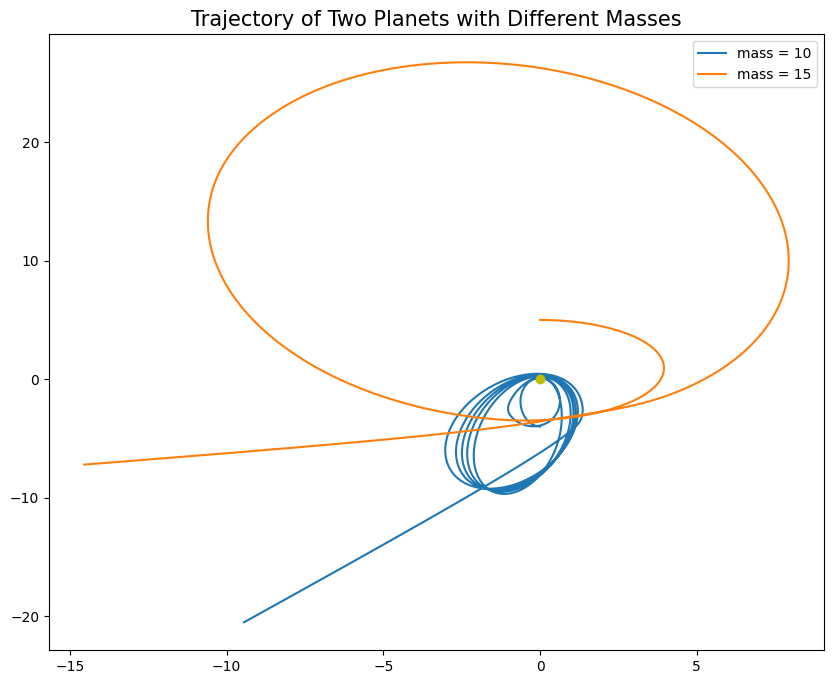

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(double_dat['y1_arr'], double_dat['x1_arr'], label='mass = 10')
plt.plot(double_dat['y2_arr'], double_dat['x2_arr'], label='mass = 15')
plt.plot(0.0, 0.0, 'yo', markersize=6)
# plt.xlim(-10, 10)
# plt.ylim(-25, 20)
plt.title('Trajectory of Two Planets with Different Masses', fontsize=15)
plt.legend()
plt.show()

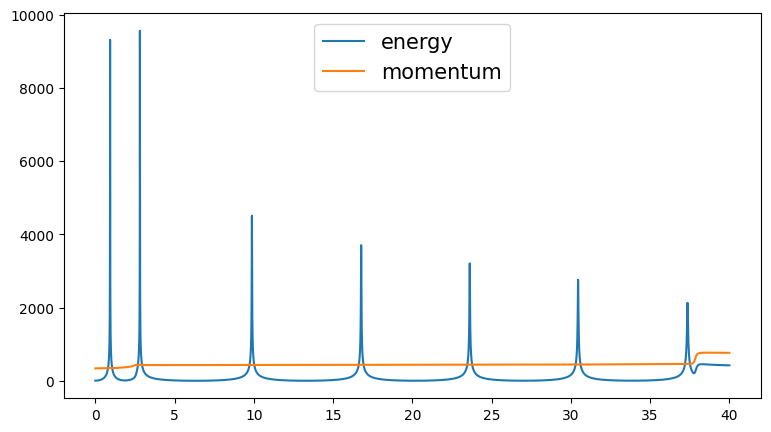

In [13]:
plt.figure(figsize=(9, 5))
plt.plot(double_dat['t_arr'], double_dat['energy_arr'], label='energy')
plt.plot(double_dat['t_arr'], double_dat['mom_arr'], label='momentum')
# plt.ylim(-500, 500)
plt.legend(fontsize=15, loc='upper center')
plt.show()

In [14]:
def veff(L, m, Md):
    rrange = np.arange(0, 10, 0.01)
    veff = []
    r_arr = []
    centr = []
    grav = []

    for r in rrange[1:]:
        c = L ** 2 / (2 * m * r ** 2)
        centr.append(c)
        g = -G * m * Md / r
        grav.append(g)
        veff.append(c + g)
        r_arr.append(r)
    return [r_arr, veff, centr, grav]

def plot_veff(pot):

    plt.figure(figsize=(8, 6))
    plt.plot(pot[0], pot[1], '-g', linewidth=3)
    plt.plot(pot[0], pot[3], '--k', linewidth=3)
    plt.plot(pot[0], pot[2], '--k', linewidth=3)
    plt.xlim(0, 10)
    plt.ylim(2.5 * min(pot[1]), -2.5 * min(pot[1]))
    plt.xlabel('distance of the planet from the star (r)', fontsize=15)
    plt.ylabel('effective potential (V$_{eff}$)', fontsize=15)
    plt.show()

In [15]:
L1 = 100
L2 = 300
pot1 = veff(L1, m1, M)
pot2 = veff(L2, m2, M)

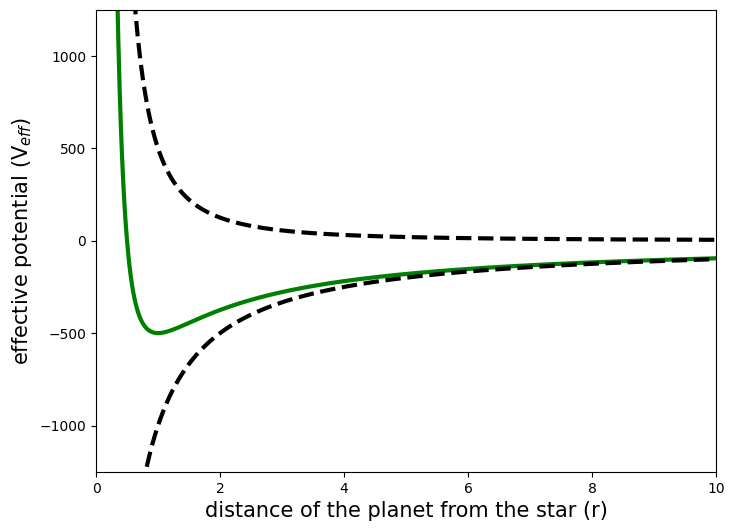

-500.0 1.0


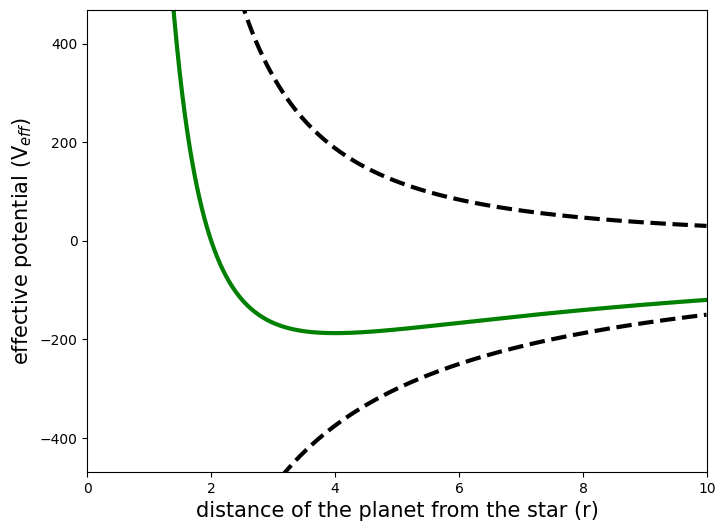

-187.5 4.0


In [16]:
plot_veff(pot1)
idx_min1 = np.argmin(pot1[1])
r1 = pot1[0][idx_min1]
print(min(pot1[1]), r1)

plot_veff(pot2)
idx_min2 = np.argmin(pot2[1])
r2 = pot2[0][idx_min2]
print(min(pot2[1]), r2)

In [ ]:
t_max = 10.0
N_max = 1000000
dd = run_2(-r1, r2, L1 / (m1 * (-r1)), L2 / (m2 * r2), t_max, N_max)

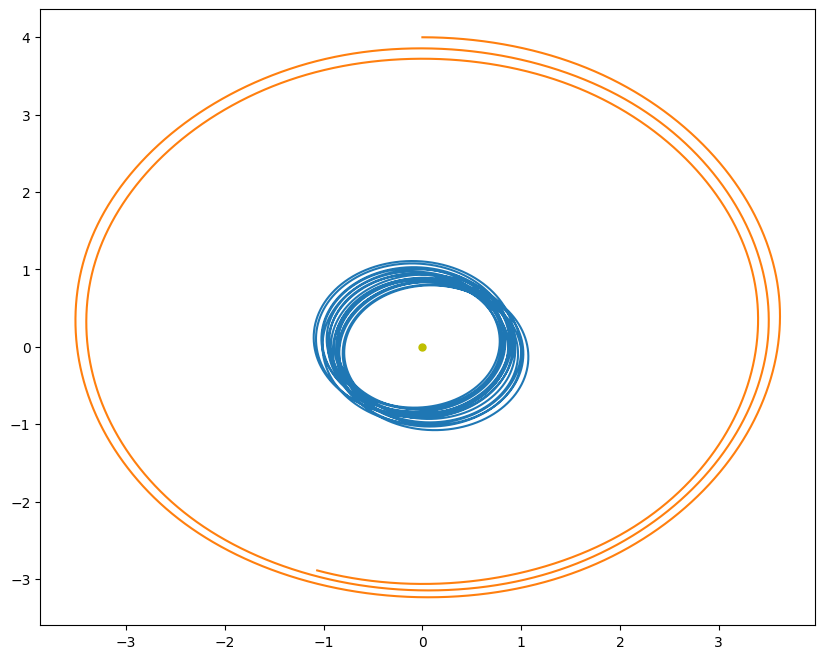

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(dd['y1_arr'], dd['x1_arr'])
plt.plot(dd['y2_arr'], dd['x2_arr'])
plt.plot(0.0, 0.0, 'yo', markersize=5)
# plt.xlim(-2, 2)
# plt.ylim(-5, 5)
plt.show()

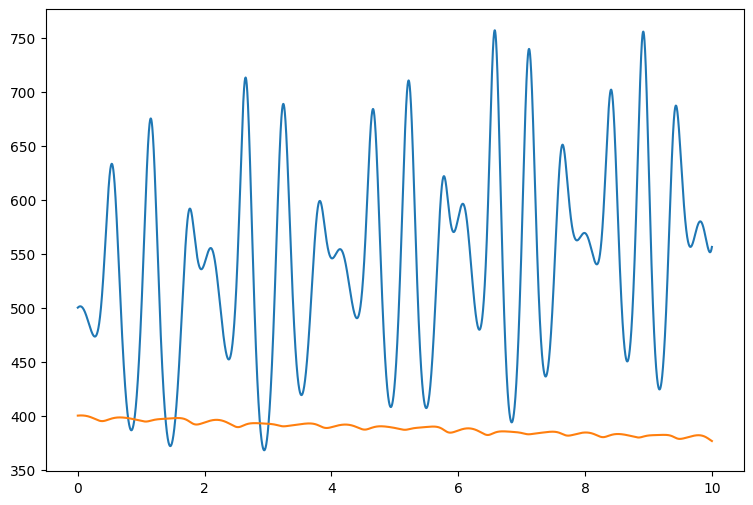

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(dd['t_arr'], dd['energy_arr'])
plt.plot(dd['t_arr'], dd['mom_arr'])
# plt.ylim(-500, 500)
plt.show()